## Voy a hacer un analisis de la relacion entre que palabras contienen los tweets y su veracidad. Este analisis abarca, cantidad de palabras, cantidad de caracteres y palabras que aparecen.

#### Importo las librerias necesarias

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#### Creo el data frame en base al csv

In [2]:
tweets = pd.read_csv('csv/train.csv', encoding='latin-1')

#### Analizo como esta formado mi data frame

In [3]:
tweets.sample(n=3)

,id,keyword,location,text,target
6475,9262,sunk,"Gaborone, Botswana",Yup. Still hasn't sunk in. ?? https://t.co/Ii2...,0
6098,8708,sinking,NaN,If you're lost and alone or you're sinking lik...,0
5825,8317,rubble,ON,China's Stock Market Crash: Are There Gems In ...,1


#### Tanto la columna de location, keyword e id son irrelevantes para este analisis.

In [4]:
del(tweets['keyword'])
del(tweets['location'])
tweets.sample(n=3)

,id,text,target
46,66,How the West was burned: Thousands of wildfire...,1
682,984,Morgan Silver Dollar 1880 S Gem BU DMPL Cameo ...,0
977,1414,Ã¥_? New Ladies Shoulder Tote #Handbag Faux Le...,0


#### me guardo cuantos caracteres contiene cada tweet

In [5]:
tweets['nºcaracteres'] = tweets['text'].str.len()

In [6]:
tweets.sample(n=3)

,id,text,target,nºcaracteres
944,1368,@luke_winkie Whoever is directing these videos...,0,131
1441,2077,@NorthBayHealth Trauma Center Shines In Respon...,1,119
2136,3066,500 deaths a year from foodborne illness... @f...,1,133


#### Ahora me interesa separar el texto en palabras.

In [7]:
tweets['palabras']=tweets['text'].str.split()

In [8]:
tweets.head()

,id,text,target,nºcaracteres,palabras
0,1,Our Deeds are the Reason of this #earthquake M...,1,69,"[Our, Deeds, are, the, Reason, of, this, #eart..."
1,4,Forest fire near La Ronge Sask. Canada,1,38,"[Forest, fire, near, La, Ronge, Sask., Canada]"
2,5,All residents asked to 'shelter in place' are ...,1,133,"[All, residents, asked, to, 'shelter, in, plac..."
3,6,"13,000 people receive #wildfires evacuation or...",1,65,"[13,000, people, receive, #wildfires, evacuati..."
4,7,Just got sent this photo from Ruby #Alaska as ...,1,88,"[Just, got, sent, this, photo, from, Ruby, #Al..."


#### Reordeno las columnas para mayor claridad.

In [9]:
tweets = tweets[['id','text','palabras','nºcaracteres','target']]

In [10]:
tweets.head()

,id,text,palabras,nºcaracteres,target
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,1
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,1
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,1
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,1
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,1


#### Me interesa saber cuantas palabras tiene que cada tweet.

In [11]:
type(tweets['palabras'])

pandas.core.series.Series

#### Guardo la cantidad de palabras en una nueva columna

In [12]:
lista_auxiliar = []
for i in tweets['palabras']:
    lista_auxiliar.append( len(i) )

In [13]:
tweets['nºpalabras'] = lista_auxiliar

In [14]:
tweets.head()

,id,text,palabras,nºcaracteres,target,nºpalabras
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,1,13
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,1,7
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,1,22
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,1,8
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,1,16


In [15]:
#### Guardo en cada tweet la cantidad de 

#### Reordeno

In [16]:
tweets = tweets[['id','text','palabras','nºcaracteres','nºpalabras','target']]

In [17]:
tweets.head()

,id,text,palabras,nºcaracteres,nºpalabras,target
0,1,Our Deeds are the Reason of this #earthquake M...,"[Our, Deeds, are, the, Reason, of, this, #eart...",69,13,1
1,4,Forest fire near La Ronge Sask. Canada,"[Forest, fire, near, La, Ronge, Sask., Canada]",38,7,1
2,5,All residents asked to 'shelter in place' are ...,"[All, residents, asked, to, 'shelter, in, plac...",133,22,1
3,6,"13,000 people receive #wildfires evacuation or...","[13,000, people, receive, #wildfires, evacuati...",65,8,1
4,7,Just got sent this photo from Ruby #Alaska as ...,"[Just, got, sent, this, photo, from, Ruby, #Al...",88,16,1


#### Ya tengo bastante ordenado el data frame. Procedo a analizar.

## Palabras que tienen mas ocurrencias en tweets.

#### Procedo a crear un nuevo dataframe, donde levanto cada palabra junto con su target y id de tweet.

In [18]:
palabras = tweets.explode('palabras')
del(palabras['text'])
del(palabras['nºcaracteres'])
del(palabras['nºpalabras'])
palabras.rename({'palabras': 'palabra', 'id': 'id_tweet','target': 'target_tweet' }, axis=1, inplace=True)
palabras.reset_index(inplace = True, drop = True)
palabras.head()

,id_tweet,palabra,target_tweet
0,1,Our,1
1,1,Deeds,1
2,1,are,1
3,1,the,1
4,1,Reason,1


#### En el analisis no voy a discrimnar por mayusculas, paso todo a minuscula.

In [19]:
palabras['palabra'] = palabras['palabra'].str.lower()
palabras.head()

,id_tweet,palabra,target_tweet
0,1,our,1
1,1,deeds,1
2,1,are,1
3,1,the,1
4,1,reason,1


#### Hay casos donde la palabra empieza con un caracter especial, ejemplo de #.

In [20]:
palabras.iloc[7]

id_tweet                  1
palabra         #earthquake
target_tweet              1
Name: 7, dtype: object

#### Yo quiero eliminar dichos caracteres, ya que en el caso que se encuentren ""#earthquake" y "earthquake" busco que cuenten como la misma palabra. 

In [21]:
import re
palabras_limpias = []
for palabra in palabras['palabra']:
    palabra_limpia = re.sub('[^A-Za-z0-9]+','', palabra)
    palabras_limpias.append(palabra_limpia)

In [22]:
palabras['palabra']=palabras_limpias

In [23]:
palabras.iloc[7]

id_tweet                 1
palabra         earthquake
target_tweet             1
Name: 7, dtype: object

#### Ahora ya borramos los caracteres especiales, el siguiente paso es borrar las palabras que aparecen 2 veces en un tweet. Esto es para que las ocurrencias no cuenten doble.


In [24]:
palabras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113461 entries, 0 to 113460
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_tweet      113461 non-null  int64 
 1   palabra       113461 non-null  object
 2   target_tweet  113461 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ MB


In [25]:
palabras.drop_duplicates(subset=['palabra','id_tweet'], keep="first", inplace = True)
palabras.reset_index(inplace = True, drop = True)

In [26]:
palabras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107617 entries, 0 to 107616
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_tweet      107617 non-null  int64 
 1   palabra       107617 non-null  object
 2   target_tweet  107617 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


#### Ya fueron eliminadas las palabras repetidas de cada tweet, todo listo para el analisis

In [27]:
agrupadas=palabras.groupby(['palabra']).agg({'target_tweet':['mean','count','sum']})
agrupadas.sample(3)

target_tweet          
                     mean count sum
palabra                            
kindle           0.000000     9   0
strongminded     0.000000     1   0
kills            0.970588    34  33

#### En este caso sum son las veces que la palabra aparece en tweets veridicos.(ya que el true esta representado con un uno)

#### Aplano el level de las columnas.

In [28]:
level0 = agrupadas.columns.get_level_values(0)
level1 = agrupadas.columns.get_level_values(1)
agrupadas.columns = level0 + '_' + level1

In [29]:
agrupadas.sample(3)

,target_tweet_mean,target_tweet_count,target_tweet_sum
palabra,,,
psalms,0.0,2,0
drjohanfranzen,1.0,1,1
immigration,1.0,1,1


#### Renombro 

In [30]:
agrupadas.rename({'target_tweet_mean': 'porcentaje_veraces', 'target_tweet_count': 'apariciones_totales','target_tweet_sum':'apariciones_veraces'}, axis=1, inplace=True)

In [31]:
agrupadas.sample(3)

,porcentaje_veraces,apariciones_totales,apariciones_veraces
palabra,,,
magichairbump,0.0,1,0
httptcobq3p7n7w06,1.0,1,1
ursula,1.0,1,1


#### Transformo el ratio en porcentaje

In [32]:
agrupadas['porcentaje_veraces'] = agrupadas['porcentaje_veraces']*100

In [33]:
agrupadas.sample(3)

,porcentaje_veraces,apariciones_totales,apariciones_veraces
palabra,,,
ppor,100.0,1,1
httptcotaxuxp9qa2,100.0,1,1
capturing,100.0,1,1


##### Agrego una columna de apariciones_falaces

In [34]:
agrupadas['apariciones_falaces'] = (agrupadas['apariciones_totales'] - agrupadas['apariciones_veraces'])

In [35]:
agrupadas.sample(3)

,porcentaje_veraces,apariciones_totales,apariciones_veraces,apariciones_falaces
palabra,,,,
poplar,50.0,2,1,1
timebomb,0.0,1,0,1
httptcom5sbfrrsn7,100.0,1,1,0


#### Considero que las palabras que aparecen menos del 0.2% de los tweets son irrelevantes para este analisis. Suelen ser 'one hit'

In [36]:
agrupadas.info() #palabras previo a filtrar

<class 'pandas.core.frame.DataFrame'>
Index: 22365 entries,  to zzzz
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   porcentaje_veraces   22365 non-null  float64
 1   apariciones_totales  22365 non-null  int64  
 2   apariciones_veraces  22365 non-null  int64  
 3   apariciones_falaces  22365 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 873.6+ KB


In [37]:
minimo_de_ocurrencias = (0.2/100)*len(tweets.index)
minimo_de_ocurrencias

15.226

In [38]:
agrupadas = agrupadas.loc[agrupadas[('apariciones_totales')]>minimo_de_ocurrencias,:]

In [39]:
agrupadas.info() #palabras despues de filtrar

<class 'pandas.core.frame.DataFrame'>
Index: 1038 entries,  to zone
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   porcentaje_veraces   1038 non-null   float64
 1   apariciones_totales  1038 non-null   int64  
 2   apariciones_veraces  1038 non-null   int64  
 3   apariciones_falaces  1038 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 40.5+ KB


#### Ordeno segun porcentaje de veracidad y apariciones totales.

In [40]:
agrupadas.sort_values(by=['porcentaje_veraces', 'apariciones_totales'], ascending=[False, False], inplace = True)

In [41]:
agrupadas.head()

,porcentaje_veraces,apariciones_totales,apariciones_veraces,apariciones_falaces
palabra,,,,
mh370,100.0,69,69,0
northern,100.0,64,64,0
debris,100.0,49,49,0
severe,100.0,44,44,0
derailment,100.0,40,40,0


#### Reordeno columnas

In [42]:
agrupadas = agrupadas[['apariciones_veraces', 'apariciones_falaces', 'apariciones_totales', 'porcentaje_veraces']]
agrupadas.head()

,apariciones_veraces,apariciones_falaces,apariciones_totales,porcentaje_veraces
palabra,,,,
mh370,69,0,69,100.0
northern,64,0,64,100.0
debris,49,0,49,100.0
severe,44,0,44,100.0
derailment,40,0,40,100.0


In [43]:
#declaro color
cmap = cm.get_cmap('YlOrBr')
saltos = np.linspace(0.3, 0.7, 20)
colores = cmap(saltos)


#### Como se distrubuyen las palabras a lo largo del porcentaje de veracidad? donde se concentran mas?

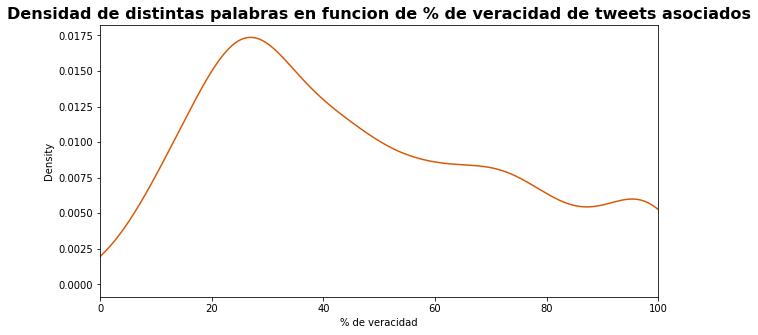

In [44]:
color = tuple( colores[19] )
fig=plt.figure()
ax = fig.add_subplot(111)
plt.xlim(0,100)
plt.title('Densidad de distintas palabras en funcion de % de veracidad de tweets asociados',fontsize=16,fontweight='bold')
ax.set_xlabel('% de veracidad')
agrupadas['porcentaje_veraces'].plot.kde(color = color , figsize=(10, 5));

#### Con esto se puede observar que en aproximadamente el 30% de la veracidad es donde se asocian mas palabras diferentes. Esto es debido a que suelen haber mas tweets verdaderos que falsos, por lo tanto es esperable que el pico este desviado hacia la izquierda del 50%.

#### Palabras con mayor % de veracidad.

In [45]:
type(colores[5])

numpy.ndarray